In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Import and preprocess the dataset

In [2]:
df = pd.read_csv(r"C:\Users\HONER\Downloads\archive (1)\Housing.csv")

In [3]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

<Axes: xlabel='price'>

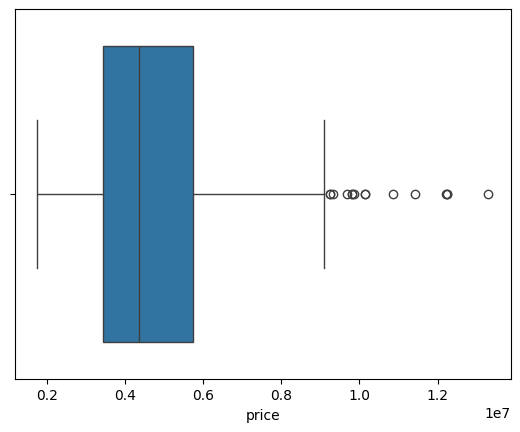

In [6]:
sns.boxplot(x = df["price"])

In [7]:
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)

In [8]:
iqr = q3 - q1

In [9]:
min_range = q1 - (iqr*1.5)
max_range = q3 - (iqr*1.5)

In [10]:
new_d = df[df["price"]<=max_range]

## Feature Encoding :-

In [26]:
from sklearn.preprocessing import OrdinalEncoder

In [27]:
oe = OrdinalEncoder()

In [33]:
new = df[["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]]

In [34]:
oe.fit(new)

OrdinalEncoder()

In [35]:
df[["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]] = pd.DataFrame(oe.transform( df[["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]]))

In [36]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,0.0
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,0.0
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,1.0
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,0.0
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1.0,0.0,1.0,0.0,0.0,2,0.0,2.0
541,1767150,2400,3,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0
542,1750000,3620,2,1,1,1.0,0.0,0.0,0.0,0.0,0,0.0,2.0
543,1750000,2910,3,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [37]:
x = df.iloc[:,1:]
y = df["price"]

## 2. Train_test_splitting the data

In [38]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [39]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,0.0
1,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,0.0
2,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,1.0
3,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,0.0
4,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1.0,0.0,1.0,0.0,0.0,2,0.0,2.0
541,2400,3,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0
542,3620,2,1,1,1.0,0.0,0.0,0.0,0.0,0,0.0,2.0
543,2910,3,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


## 3. MultiLinear Regression

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [41]:
lr.fit(x_train,y_train)

LinearRegression()

In [42]:
lr.score(x_test,y_test)*100

64.94754192267804

In [43]:
new

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
540,1.0,0.0,1.0,0.0,0.0,0.0,2.0
541,0.0,0.0,0.0,0.0,0.0,0.0,1.0
542,1.0,0.0,0.0,0.0,0.0,0.0,2.0
543,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
prd = lr.predict([[7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,0.0]])

C:\Users\HONER\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [58]:
prd

array([8235633.4415223])

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    float64
 6   guestroom         545 non-null    float64
 7   basement          545 non-null    float64
 8   hotwaterheating   545 non-null    float64
 9   airconditioning   545 non-null    float64
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    float64
 12  furnishingstatus  545 non-null    float64
dtypes: float64(7), int64(6)
memory usage: 55.5 KB


## 4. Evaluate model using MAE, MSE

In [55]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

In [62]:
mean_squared_error(y_test,lr.predict(x_test))

np.float64(1771751116594.0347)

In [60]:
mean_absolute_error(y_test,lr.predict(x_test))

np.float64(979679.6912959903)

In [61]:
np.sqrt(mean_squared_error(y_test,lr.predict(x_test)))

np.float64(1331071.4167895105)

## 5. Plot regression line and interpret coefficients

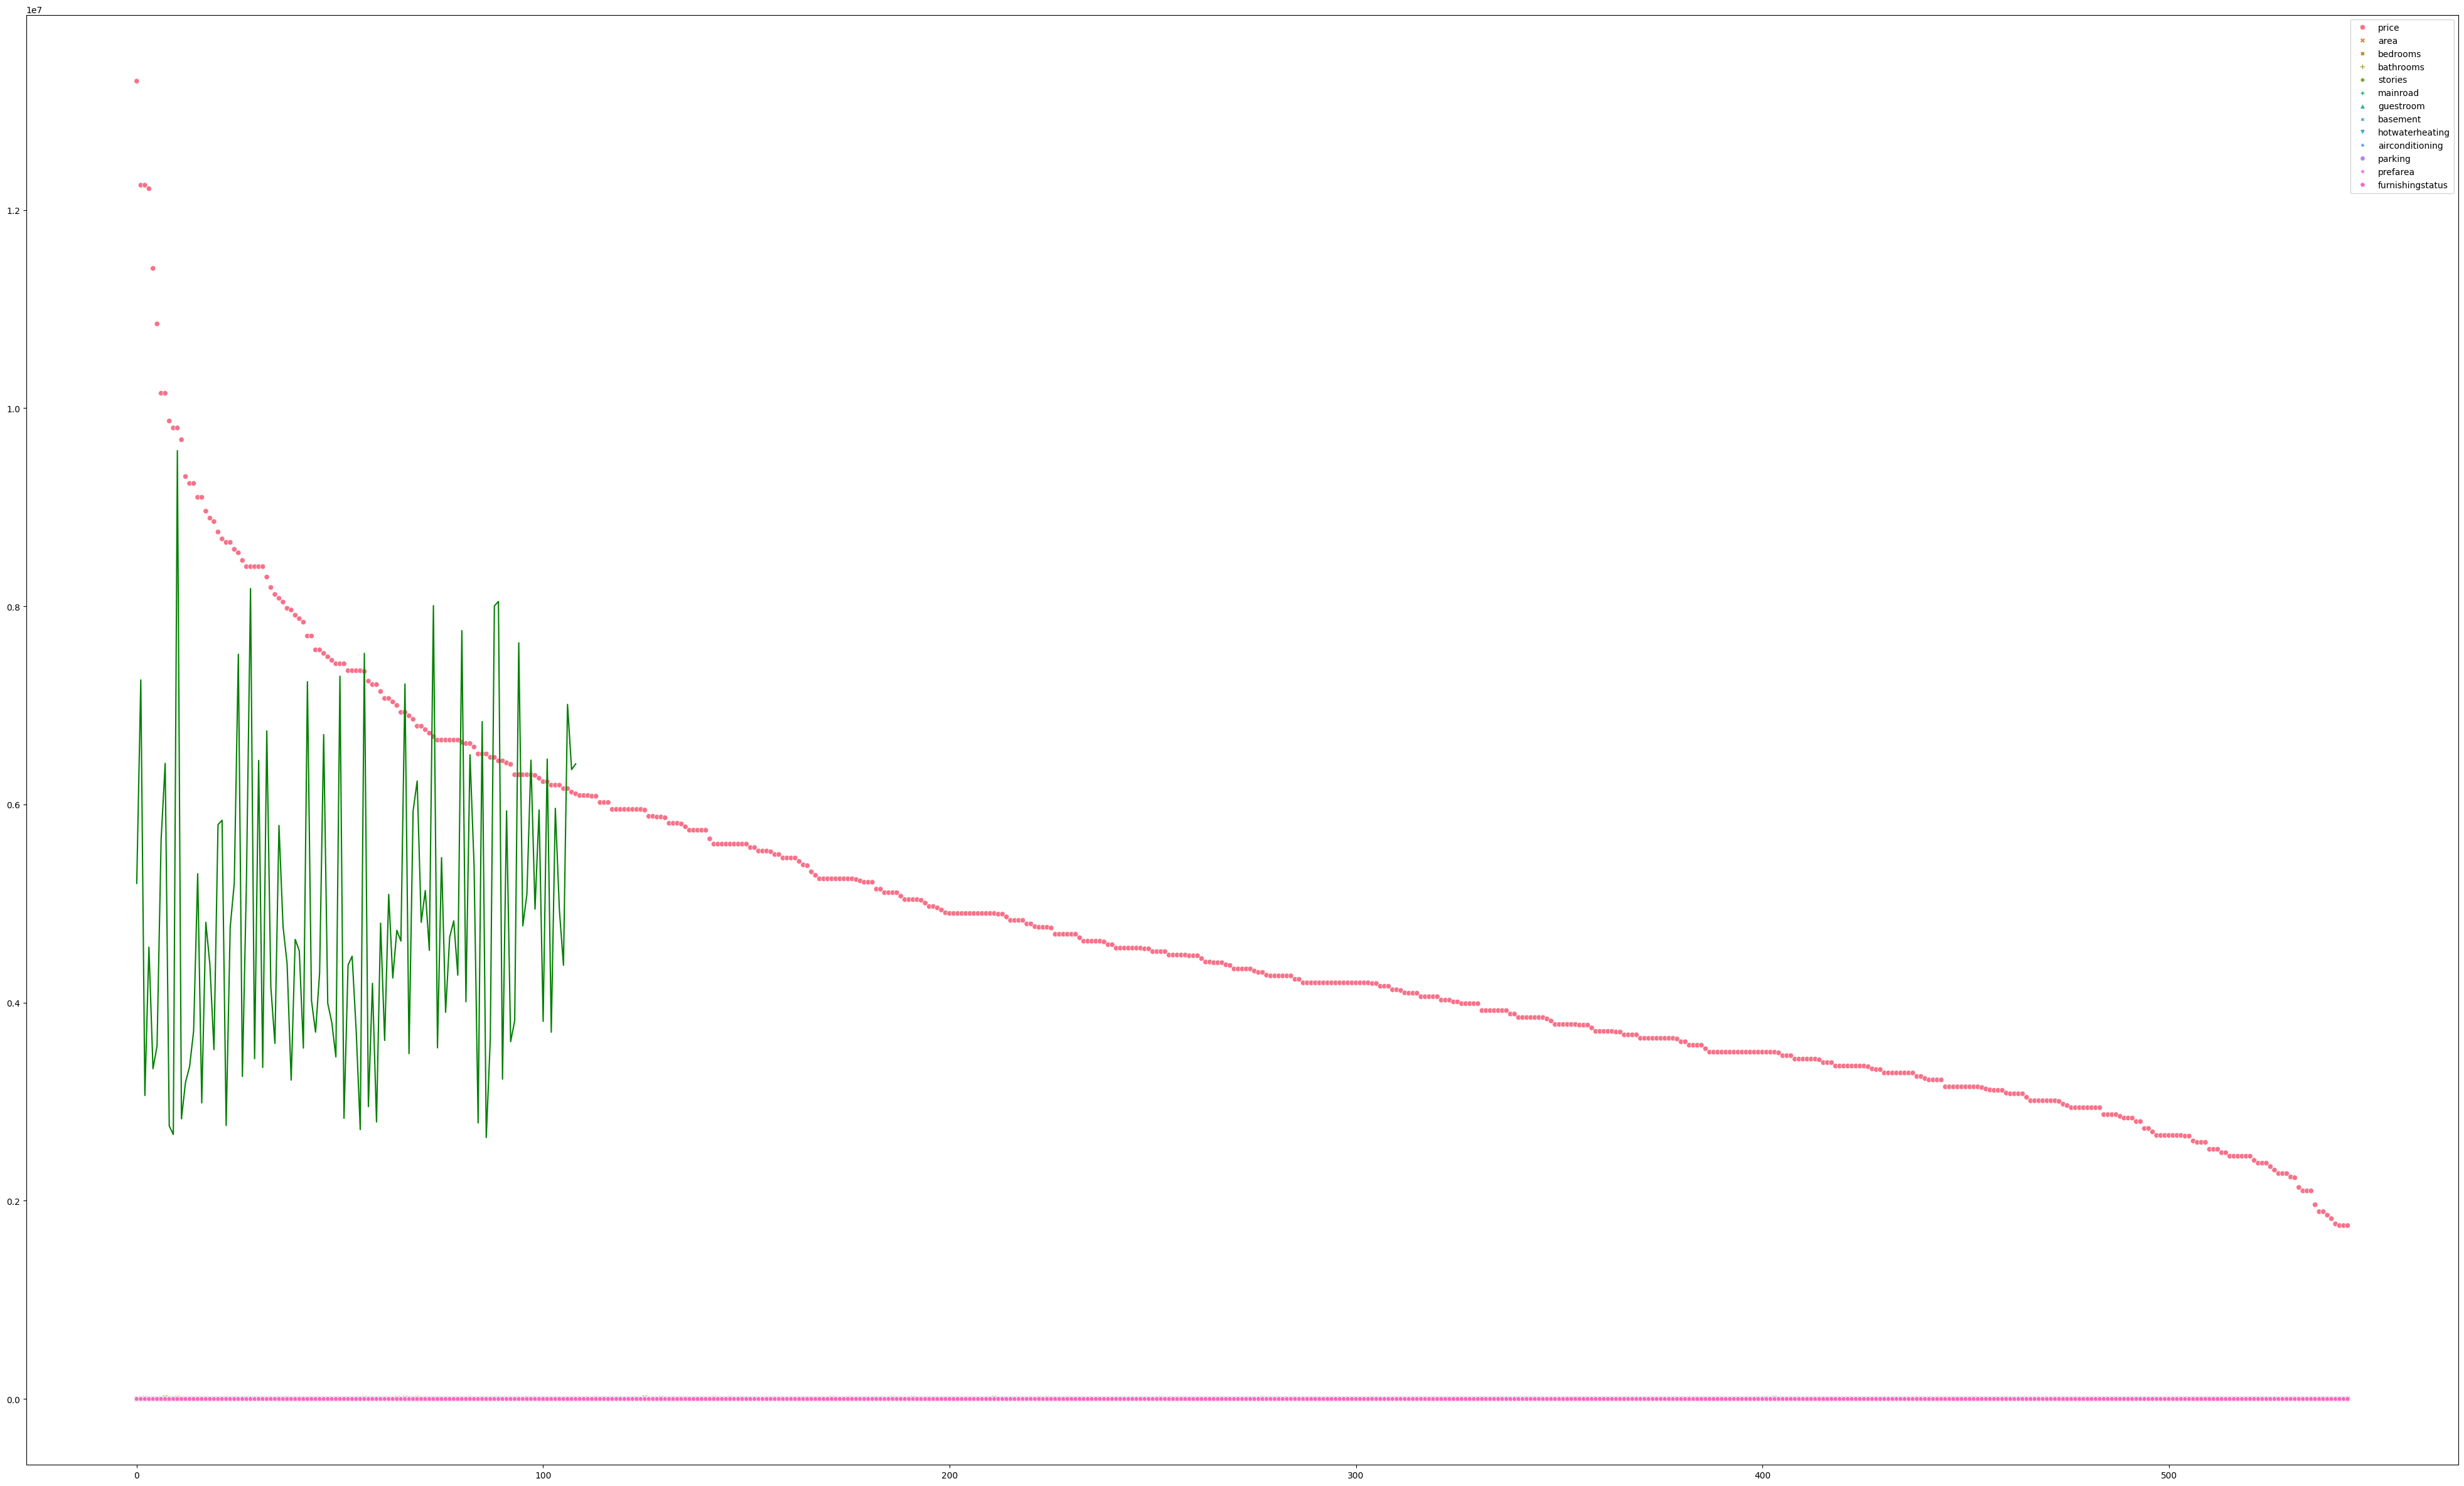

In [86]:
plt.figure(figsize=(50,30))
sns.scatterplot(data=df)
plt.plot(lr.predict(x_test),color = "green")

In [70]:
lr.coef_

array([ 2.35848772e+02,  7.85744924e+04,  1.09711727e+06,  4.06223164e+05,
        3.66824192e+05,  2.33146766e+05,  3.93159779e+05,  6.87881311e+05,
        7.85550579e+05,  2.25756514e+05,  6.29901661e+05, -2.10397118e+05])